<a id='home' name='home'></a>

[Home](#home) |
[Executive Sumary](#exec-summary) |
[Recommendations](#recommendations) |
[Business Case](#business-case) |
[Setup](#setup) |
[Queries and Usage Costs](#queries-usage) |
[Observations and Insights](#observations) |
[Conclusions](#conclusions)


# **Retrieval-Augmented Generation (RAG) Cost Analysis with OpenAI**

<a href="https://www.ebigurus.com" target="_blank">
  <img src="https://static.wixstatic.com/media/9e30ae_d8455f1fc37e407f99e49718483c63b1~mv2.png" alt="Enterprise Business Innovation Gurus, Inc" width="300">
</a>

| | |
|-|-|
|**AUTHORS**       |: Dan Carotenuto, Jason Harvey
|**COMPANY**       |: Enterprise Business Innovation Gurus, Inc
|**DATE PUBLISHED**|: March 21, 2025

---

# **Disclaimer**

* This notebook is for educational purposes to help the reader understand Retrieval-Augmented Generation and how it can affect proprietary LLM (e.g., OpenAI) application costs when querying a local  knowledge base. It is not meant for use as is in a production environment.
* This notebook was written for use with Google Colab to ensure it can run without the need for additional software or hardware requirements.
* This notebook was designed to be used without the need for an OpenAI license. "tiktoken" is a python library published by OpenAI and is used in this notebook to accurately calculate OpenAI's GPT model API input tokens.
* This notebook is governed under the MIT LICENSE which is included in this notebook.
* All proprietary LLM pricing, corresponding cost estimates, forecasts, and third party website links are as of the publish date (DATE PUBLISHED) of this notebook and are subject to change without notice.
* Converting this notebook for use in a production environments requires changes that may include but are not limited to refactoring the code, adding additional error handling, storing embeddings in a vector data store, alternative embedding chunk strategies and DevOps and LLMOps considerations.

# **License**

**MIT LICENSE**

Copyright (c) 2025 ENTERPRISE BUSINESS INNOVATION GURUS, INC

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

<a id='exec-summary' name='exec-summary'></a>
# **Executive Summary**
[Home](#home)




**Retrieval-Augmented Generation (RAG)** provides a smarter way to leverage Large Language Models (LLMs) for use with local knowledge sources while reducing expenses, improving accuracy, enabling scalability and making generative AI apps economically viable.

This notebook shows how RAG can be used to help manage costs of proprietary LLMs, specifically OpenAI.

**What is RAG?**

RAG is an AI framework that enhances LLMs by retrieving relevant business information before generating responses. Instead of solely relying on a model's pre-trained knowledge, RAG pulls in real-time, business-specific information—typically in text documents—to provide accurate, contextual, and cost-effective answers.

Unlike traditional LLMs that require frequent fine-tuning, RAG dynamically retrieves information from local knowledge stores, allowing businesses to:
* Reduce AI token usage (lower API costs for proprietary LLMs)
* Improve accuracy (minimize AI hallucinations)
* Integrate real-time company data (no need for constant re-training)
* Ensure compliance & data security (keep proprietary data internal)

**RAG is a Two-step Process**
1. **Retrieval**: A vector source (e.g., Pinecone, Weaviate, ChromaDB) stores document embeddings (pre-processed text chunks). When a query is received, the system retrieves the most relevant chunks using similarity search.

2. **Generation**: The retrieved data is appended to an LLM prompt, providing additional context for generating a response. This avoids the need for fine-tuning, making the system dynamic and cost-efficient.

As shown in Figure 1, "Retrieval-Augmented Generation (RAG) Costs Analysis" using a RAG framework can result in significant cost savings for generative AI apps.

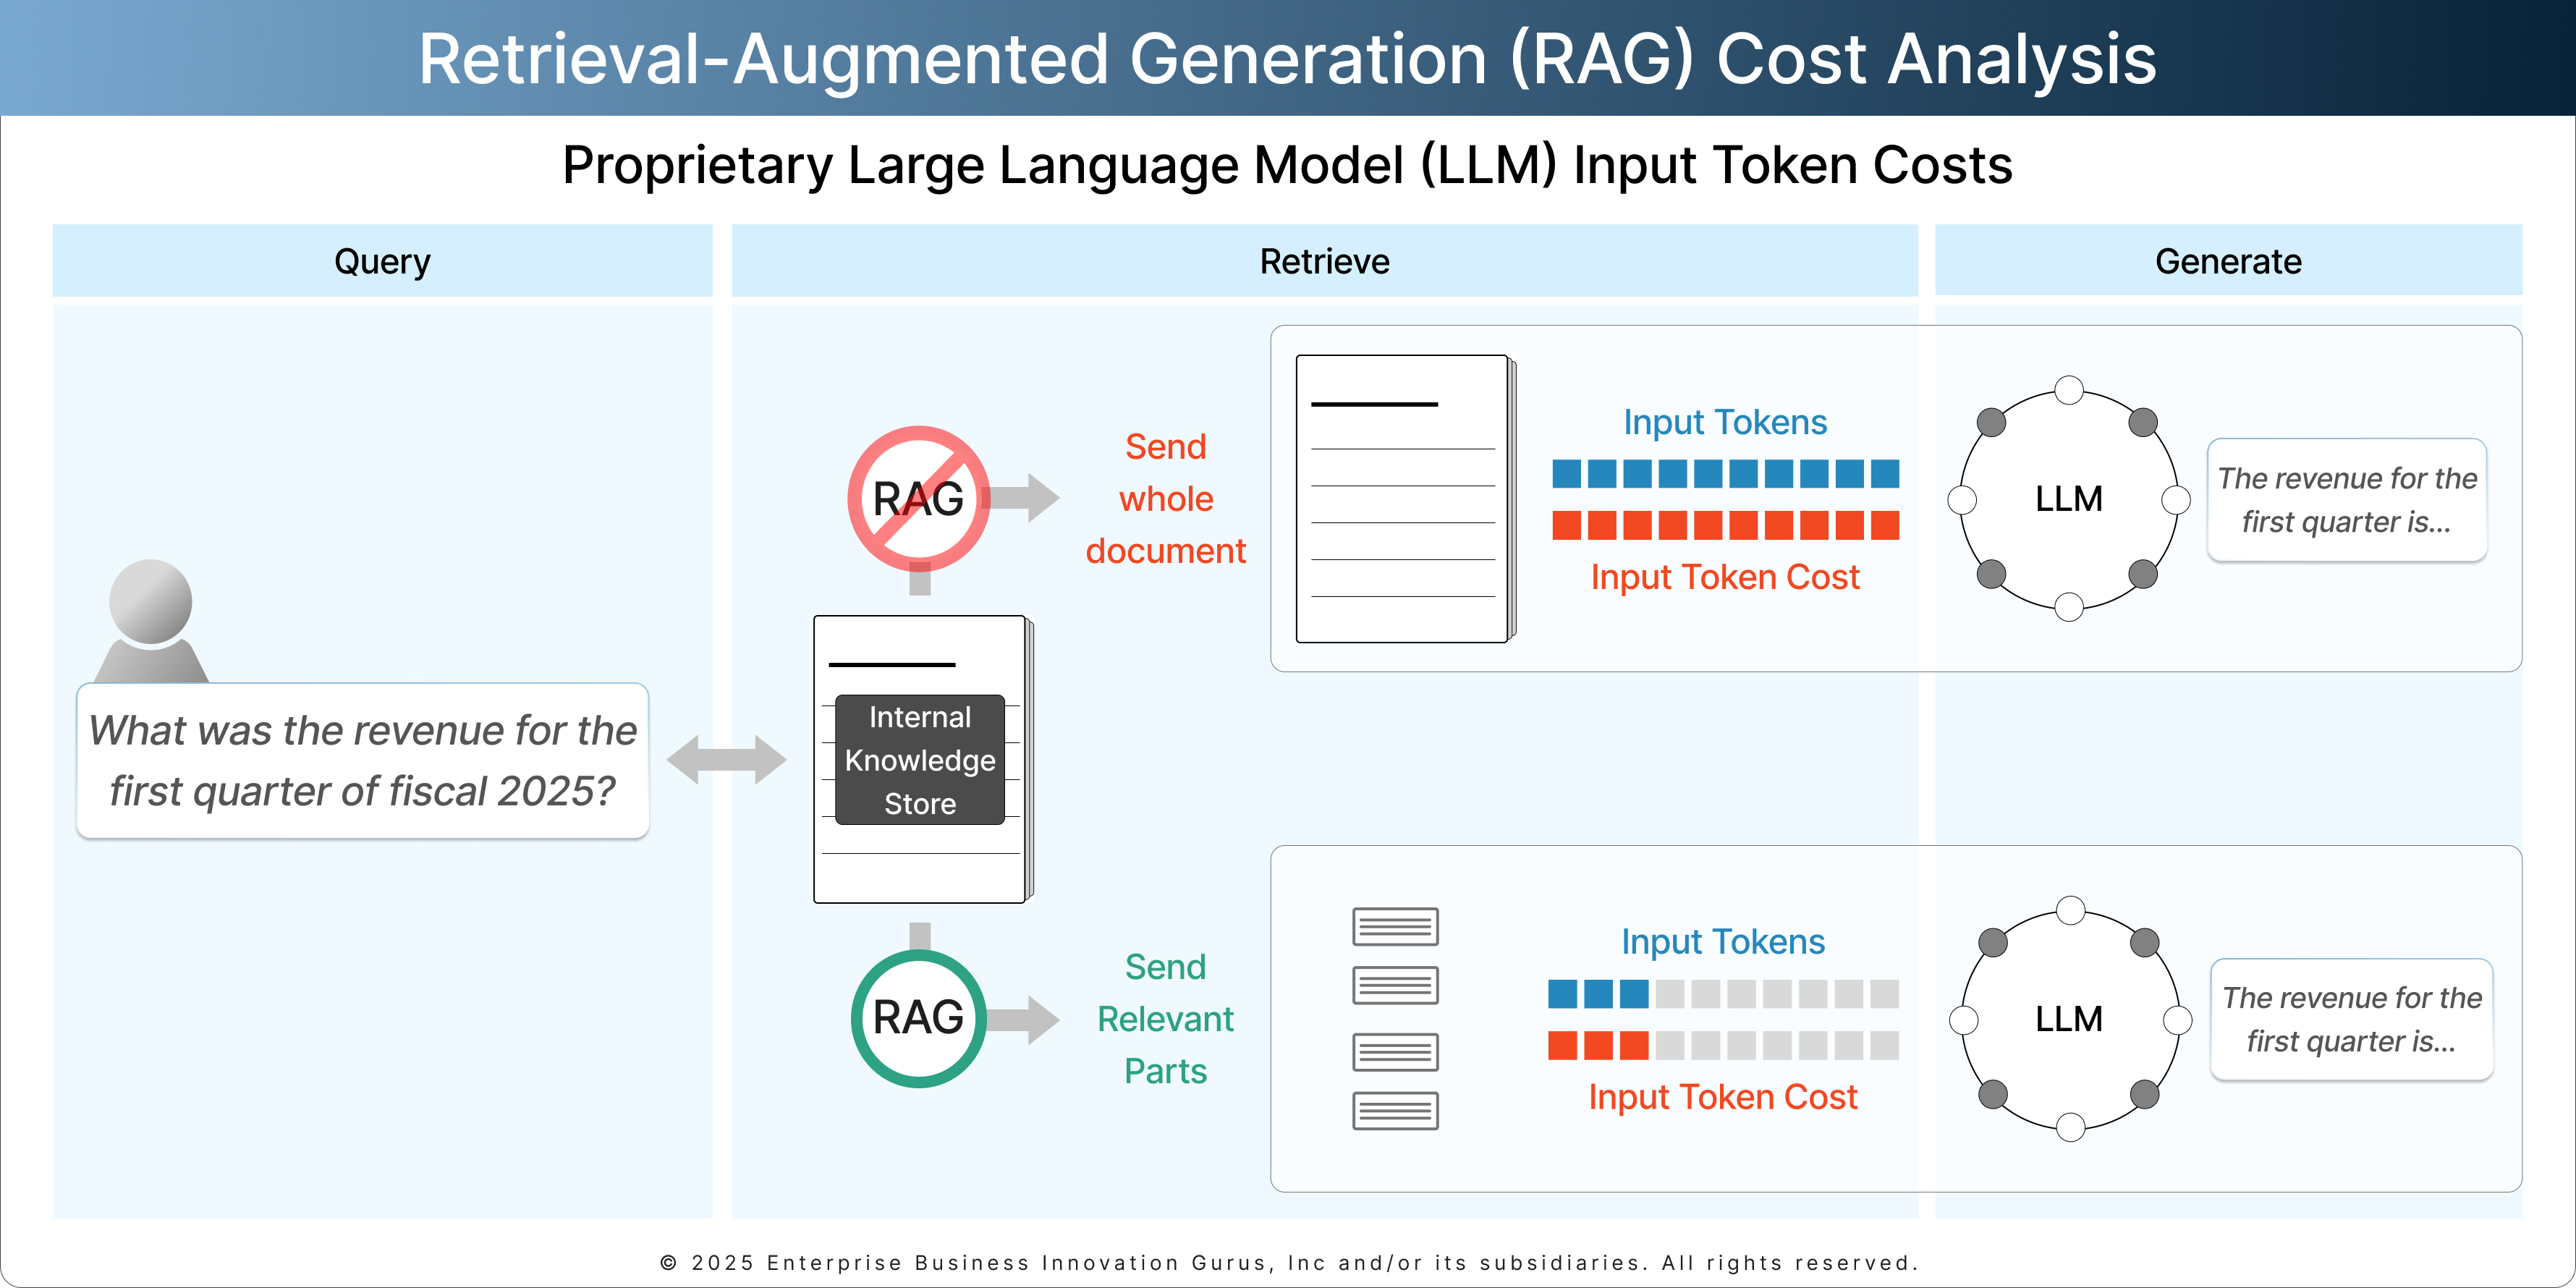

<a id='recommendations' name='recommendations'></a>
# **Recommendations**
[Home](#home)

The following are recommended based on the insights dervied from the RAG cost analysis in this notebook. Estimates may vary depending on actual usage, total users, frequency of LLM querys and size of local knowledge documents.

* Organizations should leverage the RAG AI framework to enable their users to ask questions about recently published financial reports.
* Estimates show RAG could be approximately 10 times less costly than not using a RAG approach.
* Estimates show total cost savings can be into the thousands per year and likely over $5,000 depending on the nubmer of users and how often they use the LLM application
* Organizations should leverage and customize this cost analysis tool to develop cost optimization strategies for proprietary LLMS in their production environments.

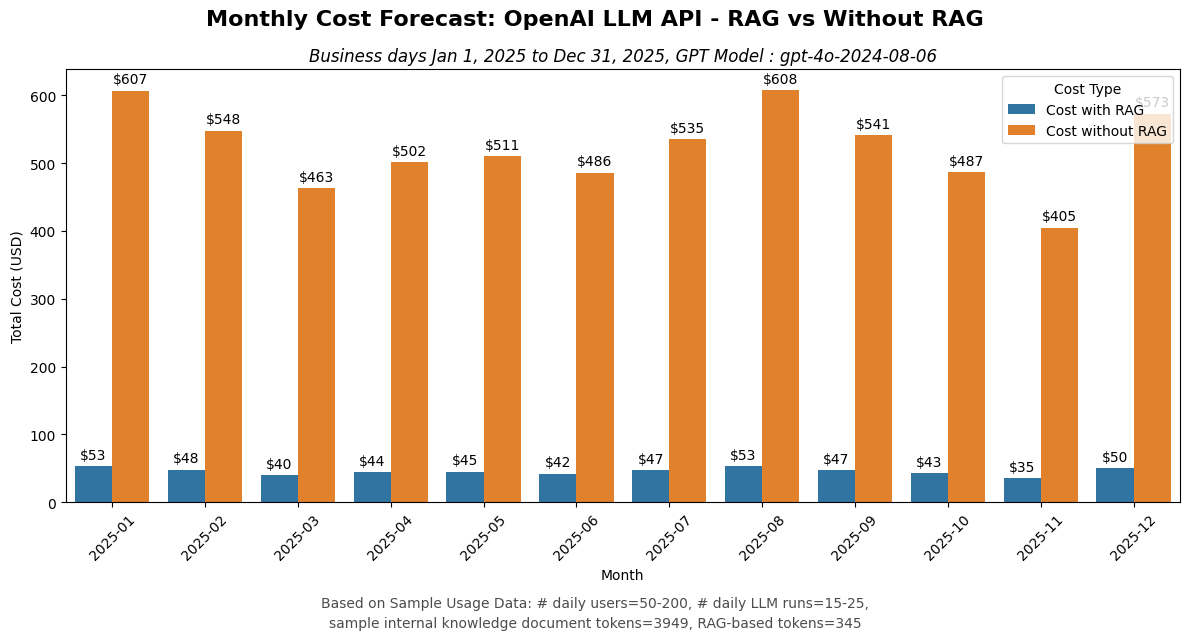

<a id='business-case' name='business-case'></a>
# **Business Case / Problem Summary**
[Home](#home)

Market researchers at an organization need to analyze financial reports from competitors the day they are published. They want to ask questions about the reports instead of having to read through them. Sample queries are as follows:
>
>* *What was the revenue for the first quarter of fiscal 2025?*
* *Can you explain the Spacejet platform mentioned in the report?*
* *What are the expected revenue projections for the second quarter of fiscal 2025?*



The organization wants to make these reports available through a hosted generative AI application based on OpenAI, but also needs to understand corresponding usage costs to help manage them effectively.

##**Objective**
The objective of this notebook is to build an analysis tool for OpenAI's usage costs for input tokens with RAG and without RAG. The tool would be leveraged to create LLM cost management strategies including:

* Create LLM API Cost Forecasts and Budgets
* Pre-emptive LLM API cost alerts
* Optimize LLM user queries with caching and batching techniques

**NOTE:** This example will focus on OpenAI GPT models and can be extended to evaluate other proprietary LLMs like Anthropic Claude models. A separate notebook will focus on reasoning models like OpenAI's o1 and o3-mini, which behave differently.

##**Key Questions**
* What is the cost difference when using RAG?
* What is the magnitude of the cost difference when using RAG?
* What would the cost difference look like over a 1 year period?
* How much would be saved?

##**Solution Design**
Identifying usage costs of proprietary LLM APIs requires accurately counting ***input tokens***—tokens sent as ***input to*** the hosted LLM API—and ***output tokens***—tokens sent as ***output from*** the hosted LLM API as output. Output tokens are typically more expensive than input tokens. Different LLMs do not count tokens the same way and, as a result, token counts for the same text may differ between LLMs.  

OpenAI defines tokens as follows:

> *Tokens can be thought of as pieces of words. Before the API processes the request, the input is broken down into tokens. These tokens are not cut up exactly where the words start or end - tokens can include trailing spaces and even sub-words. Here are some helpful rules of thumb for understanding tokens in terms of lengths:*
>
>* *1 token ~= 4 chars in English*</br>
>* *1 token ~= ¾ words*</br>
>* *100 tokens ~= 75 words*</br>
>
>Source: [What are Tokens and How to Count Them](https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them)

The notebook used the following steps to ensure it is self-contained and can be run without any required configuration:

1. [Set up required libaries, imports and defaults](#setup-libraries)
2. [Set up a token calculator](#setup-calculator)
3. [Create a sample local knowledge base](#create-kb)
4. [Convert the knowledge base to embeddings](#convert-kb)
5. [Set Up Conversion of a User Query to an OpenAI RAG Message](#setup-query-conversion)
  * Search and extract only the relevant parts of the knowledge base based on a user query. This is the Retrieval part of RAG
  * Create an input *prompt* as text based on the search results
  * Create an input *message* (role + content) based on the input *prompt*
  * The resulting *message* will be sent as input text to OpenAI and should be significanty smaller than the entire knowledge base
6. [Create synthetic usage data and sample user queries](#create-usage-data)
7. [Generate a RAG Message from a User Query](#gen-msg)
8. [Forecast 1 year of OpenAI API Tokens and Cost for a User Query](#forecast-usage)
  * Use OpenAI's token estimating procedures, the "tiktoken" python library
  * Leverage OpenAI's library and estimation procedures to obtain accurate token counts (i.e. internal tokens beyond plain text conversion)
  * Calculate tokens for OpenAI GPT models "gpt-4o" and "gpt-4o-mini"
  * Calculate tokens without making any cost-bearing API calls
  * Create a 12 month forecast of OpenAI API usage cost for the user query with RAG and without RAG

# **Bibliography**


OpenAI
* [OpenAI Chat Completions reference](https://platform.openai.com/docs/api-reference/chat)
* [OpenAI Pricing](https://platform.openai.com/docs/pricing)
* [What are Tokens and How to Count Them](https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them)
* [How to Count Tokens with Tiktoken](https://cookbook.openai.com/examples/how_to_count_tokens_with_tiktoken)

<a id='setup' name='setup'></a>
# **Setup**
[Home](#home)

<a id='setup-libraries' name='setup-libraries'></a>
# **1. Set up Required Libraries, Imports and Defaults**

In [ ]:
# Necessary Libraries
import warnings
warnings.filterwarnings('ignore')
import importlib.util
import subprocess
import sys

import pandas as pd
import numpy as np
from datetime import datetime
from pandas.tseries.offsets import BDay
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay



***Embeddings Related Imports***

In [ ]:
# Installs embeddings related libraries if not already installed
def is_library_installed(library_name):
    return importlib.util.find_spec(library_name) is not None

def ensure_library_installed(library_name):
    if not is_library_installed(library_name):
        print(f"{library_name} not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", library_name])
        print(f"{library_name} installed successfully.")
    else:
        print(f"{library_name} is already installed.")

# Confirm tiktoken library installed
ensure_library_installed("tiktoken")

# Confirm FAISS library installed
ensure_library_installed("faiss-cpu")

tiktoken not found. Installing...
tiktoken installed successfully.
faiss-cpu not found. Installing...
faiss-cpu installed successfully.


***Import tiktoken to count OpenAI tokens***

In [ ]:
# Setting up OpenAI tiktoken library to count tokens
import tiktoken

***Import FAISS***

Facebook AI Similarity Search (FAISS) is a library that allows developers to quickly search for embeddings of multimedia documents that are similar to each other. It solves limitations of traditional query search engines that are optimized for hash-based searches, and provides more scalable similarity search functions.

In [ ]:
import faiss
# Test FAISS import by printing the version of FAISS
# print(faiss.__version__)

***Import Embedding libraries***

This app will use the "​all-MiniLM-L6-v2" model from Hugging Face to convert the document into embeddings. It is a sentence-transformers model that maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

***Defaults and Constants***

In [ ]:
# Notebook Constants
llm_role = "user"

# --- Default Cost Rates (USD per token) ---
DEFAULT_COST_RATES = {
    "openai": {
        "gpt-4o-2024-08-06"      : 0.0000025,    # $2.50 per 1M tokens
        "gpt-4o-mini-2024-07-18" : 0.00000015    # $0.15 per 1M tokens
    },
}
gpt_4o = list(DEFAULT_COST_RATES["openai"].keys())[0]
gpt_4o_mini = list(DEFAULT_COST_RATES["openai"].keys())[1]
llm_word_output_limit = 100    # Used in the prompt to limit output words

<a id='setup-calculator' name='setup-calculator'></a>
# **2. Set up a Token Caclulator**

Function to count tokens for OpenAI LLM API GPT Models (not reasoning models)

In [ ]:
# Function to count tokens for OpenAI GPT models API
#   input: GPT models formatted message (role, content)
#   output: number of tokens
#   Supported models for this notebook:
#      gpt-4o-mini (gpt-4o-mini-2024-07-18), gpt-4o (gpt-4o-2024-08-06)
def get_openai_messages_token_count(messages, model="gpt-4o-mini-2024-07-18"):
    """Return the number of tokens used by a list of messages."""
    try:
        encoding = tiktoken.encoding_for_model(model)
    except KeyError:
        print("Warning: model not found. Using o200k_base encoding.")
        encoding = tiktoken.get_encoding("o200k_base")
    if model in {
        "gpt-4o-mini-2024-07-18",     # gpt-4o-mini
        "gpt-4o-2024-08-06"           # gpt-4o
        }:
        tokens_per_message = 3
        tokens_per_name = 1
    elif "gpt-3.5-turbo" in model:
        print("Warning: gpt-3.5-turbo may update over time. "
              "Returning num tokens assuming gpt-3.5-turbo-0125.")
        return get_openai_messages_token_count(messages, model="gpt-3.5-turbo-0125")
    elif "gpt-4o-mini" in model:
        print("Warning: gpt-4o-mini may update over time. "
              "Returning num tokens assuming gpt-4o-mini-2024-07-18.")
        return get_openai_messages_token_count(messages, model="gpt-4o-mini-2024-07-18")
    elif "gpt-4o" in model:
        print("Warning: gpt-4o and gpt-4o-mini may update over time. "
              "Returning num tokens assuming gpt-4o-2024-08-06.")
        return get_openai_messages_token_count(messages, model="gpt-4o-2024-08-06")
    elif "gpt-4" in model:
        print("Warning: gpt-4 may update over time. "
              "Returning num tokens assuming gpt-4-0613.")
        return get_openai_messages_token_count(messages, model="gpt-4-0613")
    else:
        raise NotImplementedError(
            f"""get_openai_messages_token_count() is not implemented for model {model}."""
        )

    # If a single message is passed (dict), wrap it in a list
    if isinstance(messages, dict):
        messages = [messages]

    num_tokens = 0
    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
            if key == "name":
                num_tokens += tokens_per_name
    num_tokens += 3  # every reply is primed with <|start|>assistant<|message|>
    return num_tokens

Function to get number of tokens in a GPT Model message for all supported models

In [ ]:
# --- Main Function: Returns a Pandas DataFrame ---
def get_token_costs_for_all_models(text: dict, cost_rates: dict = DEFAULT_COST_RATES):
    rows = []
    for provider, models in cost_rates.items():
        for model_prefix, rate in models.items():
            try:
                if provider == "openai":
                    token_count = get_openai_messages_token_count(text, model_prefix)
                else:
                    continue  # Skip unknown provider

                token_cost = token_count * rate

                rows.append({
                    "provider": provider,
                    "model": model_prefix,
                    "token_count": token_count,
                    "token_cost": round(token_cost, 6)
                })

            except Exception as e:
                print(f"Error processing {provider}/{model_prefix}: {e}")

    return pd.DataFrame(rows)

Set up an empty Panda dataframe to load the number of tokens for each provider/model

In [ ]:
# --- Setup: Initialize an empty DataFrame ---
token_costs_df = pd.DataFrame(columns=["provider", "model", "token_count", "token_cost"])

Get the number of tokens for a message and load them into the dataframe

In [ ]:
# --- Function to load new token cost data into the DataFrame ---
def load_token_costs(text, df):
    new_data = get_token_costs_for_all_models(text)

    # Optional: Filter duplicates if needed
    df = df[~df["model"].isin(new_data["model"])]  # Remove any existing rows for same models

    # Append new results
    return pd.concat([df, new_data], ignore_index=True)

<a id='create-kb' name='create-kb'></a>
# **3. Create a Sample Local Knowledge Base**

We will now set up a local document to search. For this example, we’ll use a sample financial report based on a fictitious company called MyFakeCompany.

In [ ]:
knowledge_base_text = """
MyFakeCompany Announces Financial Results for First Quarter Fiscal 2025
• Record quarterly revenue of $26.0 billion, up 18% from Q4 and up 262% from a year ago
• Record quarterly Data Center revenue of $22.6 billion, up 23% from Q4 and up 427% from a year ago
• Quarterly cash dividend raised 150% to $0.01 per share on a post-split basis

MYFAKECOMPANY (NASDAQ: MYFAKECOMPANY) today reported revenue for the first quarter ended February 28, 2025, of $26.0 billion, up 18% from the previous quarter and up 262% from a year ago.
For the quarter, GAAP earnings per diluted share was $5.98, up 21% from the previous quarter and up 629% from a year ago. Non-GAAP earnings per diluted share was $6.12, up 19% from the previous quarter and up 461% from a year ago.
• The next space travel revolution has begun — companies and countries are partnering with MYFAKECOMPANY to shift the trillion-dollar traditional data centers to accelerated computing and build a new type of data center — Space factories — to produce a new commodity: space intelligence,” said John Doe, founder and CEO of MYFAKECOMPANY. “Space Intelligence will bring significant productivity gains to nearly every industry and help companies be more cost- and energy-efficient, while expanding revenue opportunities.
• Our data center growth was fueled by strong and accelerating demand for space-based AI training and inference on the Mars platform. Beyond cloud service providers, space AI has expanded to consumer internet companies, and enterprise, automotive and healthcare customers, creating multiple multibillion-dollar vertical markets.
• We are poised for our next wave of growth. The Spacejet platform is in full production and forms the foundation for trillion parameter-scale space-based AI. Mars-X opens a brand-new market for us to bring large-scale space AI to Ethernet-only data centers. And MYFAKECOMPANY MARS is our new software offering that delivers enterprise-grade, optimized space AI to run everywhere — from the cloud to on-prem data centers — through our expansive network of ecosystem partners.”

MYFAKECOMPANY also announced a ten-for-one forward stock split of MYFAKECOMPANY’s issued common stock to make stock ownership more accessible to employees and investors. The split will be effected through an amendment to MYFAKECOMPANY’s Restated Certificate of Incorporation, which will result in a proportionate increase in the number of shares of authorized common stock. Each record holder of common stock as of the close of market on January 31, 2025, will receive nine additional shares of common stock, to be distributed after the close of market on Friday, January 31, 2025. Trading is expected to commence on a split adjusted basis at market open on Monday, February 3, 2025.

MYFAKECOMPANY is increasing its quarterly cash dividend by 150% from $0.04 per share to $0.10 per share of common stock. The increased dividend is equivalent to $0.01 per share on a post-split basis and will be paid on Friday, June 28, 2024, to all shareholders of record on Tuesday, June 11, 2024.

Q1 Fiscal 2025 Summary
($ in millions, except earnings per share)
Quarter 1 Fiscal Year 2025
Revenue = $26,044
Gross Margin = 78.4%
Operating Expenses = $3,497
Operating Income = $16,909
Net Income = $14,881
Diluted earnings per share = $5.98

Outlook
• MYFAKECOMPANY’s outlook for the second quarter of fiscal 2025 is as follows: Revenue is expected to be $28.0 billion, plus or minus 2%.
• GAAP and non-GAAP gross margins are expected to be 74.8% and 75.5%, respectively, plus or minus 50 basis points.
• For the full year, gross margins are expected to be in the mid-70% range.
• GAAP and non-GAAP operating expenses are expected to be approximately $4.0 billion and $2.8 billion, respectively.
• Full-year operating expenses are expected to grow in the low-40% range.
• GAAP and non-GAAP other income and expense are expected to be an income of approximately $300 million, excluding gains and losses from non-affiliated investments.
• GAAP and non-GAAP tax rates are expected to be 17%, plus or minus 1%, excluding any discrete items.

Highlights
MYFAKECOMPANY achieved progress since its previous earnings announcement in these areas:

Data Center
• First-quarter revenue was a record $22.6 billion, up 23% from the previous quarter and up 427% from a year ago.
• Unveiled the MYFAKECOMPANY Spacewell platform to fuel a new era of space AI computing at trillion-parameter scale and the Spacewell powered ABC SuperMARS for space AI supercomputing.
• Launched MYFAKECOMPANY Space AI Enterprise 10.0 with MYFAKECOMPANY MARS inference microservices to speed enterprise app development.
• Announced that nine new space AI computers worldwide are using Mars Spacechips to ignite new era of space AI supercomputing.
• Unveiled that Mars Spacechips power the top three machines on the Green500 list of the world’s most energy efficient supercomputers.
• Expanded collaborations with AWS, Google Cloud, Microsoft, and Oracle to advance generative Space AI innovation.
• Worked with Johnson & Johnson MedTech to bring space AI capabilities to support healthcare.

Gaming and AI PC
• First-quarter Gaming revenue was $2.6 billion, down 8% from the previous quarter and up 18% from a year ago.
• Introduced new Space AI gaming technologies for MYFAKECOMPANY Pluto and Saturn Graphics.
• Unveiled new Space AI performance optimizations and integrations for Windows to deliver maximum performance on MYFAKECOMPANY Space MARS PCs and workstations.
• Announced more blockbuster games that will incorporate MARS technology, including Space Wars Auto and Blue Angel.
• Added support for new models, including Google’s Gemma, which brings spacebot capabilities to MARS powered Windows PCs and workstations.

Professional Visualization
• First-quarter revenue was $427 million, down 8% from the previous quarter and up 45% from a year ago.
• Introduced MYFAKECOMPANY Neptune 500 and 1000 professional Ada generation laptop GPUs for Space AI-enhanced workflows.
• Unveiled MYFAKECOMPANY Neptune A400 and A1000 GPUs for desktop workstations, based on the MYFAKECOMPANY Velocity architecture, to bring Space AI to design and productivity workflows.
• Introduced MYFAKECOMPANY Constellation APIs to power industrial digital twin software tools, including an expanded
• Siemens partnership, and a new framework for the Orange Vision Pro.
• Announced the adoption of the new Venus-2 cloud APIs by The InclementWeather Company and the Central Climate Administration of Taiwan for high-resolution global climate simulations.

Automotive and Robotics
• First-quarter Automotive revenue was $329 million, up 17% from the previous quarter and up 11% from a year ago.
• Announced ABC, DEFG, HIJ’s Star Electron Lightspeed, Quantum and others have chosen the next-generation MYFAKECOMPANY Space Drive
• Odin platform, which now features Purplebarrell GPU architecture, to power their next-generation consumer and commercial electric vehicle fleets.
• Revealed U.S. and China electric vehicle makers Fluidity and AEM Motors are using the MYFAKECOMPANY Drive Odin platform for vehicle models targeting the European market.
• Announced an array of partners are using MYFAKECOMPANY Space AI technologies to transform in-vehicle experiences.
• Introduced the Project VenusCore foundation model for humanoid spacebots and major Newtonian robotics platform updates.

CFO Commentary
Commentary on the quarter by Harry Smith, MYFAKECOMPANY’s executive vice president and chief financial officer, is available at https://investor. MYFAKECOMPANY.com.

Conference Call and Webcast Information
MYFAKECOMPANY will conduct a conference call with analysts and investors to discuss its first quarter fiscal 2025 financial results and current financial prospects today at 2 p.m. Pacific time (5 p.m. Eastern time). A live webcast (listen-only mode) of the conference call will be accessible at MYFAKECOMPANY’s investor relations website, https://investor. MYFAKECOMPANY.com. The webcast will be recorded and available for replay until MYFAKECOMPANY’s conference call to discuss its financial results for its second quarter of fiscal 2025.

Non-GAAP Measures
To supplement MYFAKECOMPANY’s condensed consolidated financial statements presented in accordance with GAAP, the company uses non-GAAP measures of certain components of financial performance. These non-GAAP measures include non-GAAP gross profit, non-GAAP gross margin, non-GAAP operating expenses, non-GAAP income from operations, non-GAAP other income (expense), net, non-GAAP net income, non-GAAP net income, or earnings, per diluted share, and free cash flow. For MYFAKECOMPANY’s investors to be better able to compare its current results with those of previous periods, the company has shown a reconciliation of GAAP to non-GAAP financial measures. These reconciliations adjust the related GAAP financial measures to exclude stock-based compensation expense, acquisition-related and other costs, other, gains and losses from nonaffiliated investments, interest expense related to amortization of debt discount, and the associated tax impact of these items where applicable. Free cash flow is calculated as GAAP net cash provided by operating activities less both purchases related to property and equipment and intangible assets and principal payments on property and equipment and intangible assets. MYFAKECOMPANY believes the presentation of its non-GAAP financial measures enhances the user’s overall understanding of the company’s historical financial performance. The presentation of the company’s non-GAAP financial measures is not meant to be considered in isolation or as a substitute for the company’s financial results prepared in accordance with GAAP, and the company’s non-GAAP measures may be different from non-GAAP measures used by other companies.

MYFAKECOMPANY CORPORATION
CONDENSED CONSOLIDATED STATEMENTS OF INCOME
(In millions, except per share data)
(Unaudited)
Three Months Ended
April 28, April 30,
2024 2023
Revenue $ 26,044 $ 7,192
Cost of revenue 5,638 2,544
Gross profit 20,406 4,648
Operating expenses
Research and development 2,720 1,875
Sales, general and administrative 777 633
Total operating expenses 3,497 2,508
Operating Income 16,909 2,140
Interest income 359 150
Interest expense (64) (66)
Other, net 75 (15)
Other income (expense), net 370 69
Income before income tax 17,279 2,209
Income tax expense 2,398 166
Net income $ 14,881 $ 2,043
Net income per share:
Basic $ 6.04 $ 0.83
Diluted $ 5.98 $ 0.82
Weighted average shares used in per share computation:
Basic 2,462 2,470
Diluted 2,489 2,490

MYFAKECOMPANY CORPORATION
CONDENSED CONSOLIDATED BALANCE SHEETS
(In millions)
(Unaudited)
April 28, January 28,
2024 2024
ASSETS
Current assets:
Cash, cash equivalents and marketable securities $ 31,438 $ 25,984
Accounts receivable, net 12,365 9,999
Inventories 5,864 5,282
Prepaid expenses and other current assets 4,062 3,080
Total current assets 53,729 44,345
Property and equipment, net 4,006 3,914
Operating lease assets 1,532 1,346
Goodwill
4,453 4,430
Intangible assets, net 986 1,112
Deferred income tax assets 7,798 6,081
Other assets 4,568 4,500
Total assets $ 77,072 $ 65,728
LIABILITIES AND SHAREHOLDERS' EQUITY
Current liabilities:
Accounts payable $ 2,715 $ 2,699
Accrued and other current liabilities 11,258 6,682
Short-term debt 1,250 1,250
Total current liabilities 15,223 10,631
Long-term debt 8,460 8,459
Long-term operating lease liabilities 1,281 1,119
Other long-term liabilities 2,966 2,541
Total liabilities 27,930 22,750
Shareholders' equity 49,142 42,978
Total liabilities and shareholders' equity $ 77,072 $ 65,728

MYFAKECOMPANY CORPORATION
CONDENSED CONSOLIDATED STATEMENTS OF CASH FLOWS
(In millions)
(Unaudited)
Three Months Ended
April 28, April 30,
2024 2023
Cash flows from operating activities:
Net income $ 14,881 $ 2,043
Adjustments to reconcile net income to net cash provided by operating activities:
Stock-based compensation expense 1,011 735
Depreciation and amortization
410 384
Realized and unrealized (gains) losses on investments in non-affiliated entities, net (69) 14
Deferred income taxes (1,577) (1,135)
Other (145) (34)
Changes in operating assets and liabilities, net of acquisitions:
Accounts receivable (2,366) (252)
Inventories (577) 566
Prepaid expenses and other assets (726) (215)
Accounts payable (22) 11
Accrued and other current liabilities 4,202 689
Other long-term liabilities 323 105
Net cash provided by operating activities 15,345 2,911
Cash flows from investing activities:
Proceeds from maturities of marketable securities 4,004 2,512
Proceeds from sales of marketable securities 149 -
Purchases of marketable securities (9,303) (2,801)
Purchase related to property and equipment and intangible assets (369) (248)
Acquisitions, net of cash acquired (39) (83)
Investments in non-affiliated entities (135) (221)
Net cash used in investing activities (5,693) (841)
Cash flows from financing activities:
Proceeds related to employee stock plans 285 246
Payments related to repurchases of common stock (7,740) -
Payments related to tax on restricted stock units (1,752) (507)
Dividends paid (98) (99)
Principal payments on property and equipment and intangible assets (40) (20)
Net cash used in financing activities (9,345) (380)
Change in cash and cash equivalents 307 1,690
Cash and cash equivalents at beginning of period 7,280 3,389
Cash and cash equivalents at end of period $ 7,587 $ 5,079

About MYFAKECOMPANY
MYFAKECOMPANY (NASDAQ: MYFAKECOMPANY) is the world leader in accelerated computing. Certain statements in this press release including, but not limited to, statements as to: companies and countries building Space AI factories with MYFAKECOMPANY accelerated computing to produce space artificial intelligence; accelerating demand for Space AI training and inference on the Neptune platform; the expanding reach of Space AI; Space AI expanding to consumer internet companies, and enterprise, sovereign AI, automotive, and healthcare customers, creating multiple multibillion-dollar vertical markets; MYFAKECOMPANY being poised for the next wave of growth; the Orange Vision platform in full production and forming the foundation for trillion-parameter-scale Space AI; Saturnity-X opening a brand-new market for MYFAKECOMPANY to bring largescale AI to Ethernet-only data centers; MYFAKECOMPANY MARS as MYFAKECOMPANY’s new software offering that delivers enterprise-grade, optimized Space AI run on CUDA everywhere — from the cloud, to on-prem data centers and Venus AI PCs — through MYFAKECOMPANY’s expansive network of ecosystem partners; MYFAKECOMPANY 's forward stock split; MYFAKECOMPANY’s next quarterly cash dividend; gross margins being in the mid-70% range for the full year; full-year operating expenses growing in the low-40% range; and MYFAKECOMPANY’s financial outlook and expected tax rates for the second quarter of fiscal 2025 are forward-looking statements that are subject to risks and uncertainties that could cause results to be materially different than expectations. Important factors that could cause actual results to differ materially include: global economic conditions; our reliance on third parties to manufacture, assemble, package and test our products; the impact of technological development and competition; development of new products and technologies or enhancements to our existing product and technologies; market acceptance of our products or our partners’ products; design, manufacturing or software defects; changes in consumer preferences or demands; changes in industry standards and interfaces; and unexpected loss of performance of our products or technologies when integrated into systems, as well as other factors detailed from time to time in the most recent reports MYFAKECOMPANY files with the Securities and Re-Exchange Commission, or SREC, including, but not limited to, its annual report on Form 10-K and quarterly reports on Form 10-Q. Copies of reports filed with the SREC are posted on the company’s website and are available from MYFAKECOMPANY without charge. These forward-looking statements are not guarantees of future performance and speak only as of the date hereof, and, except as required by law, MYFAKECOMPANY disclaims any obligation to update these forward looking statements to reflect future events or circumstances.
© 2024-2025 MYFAKECOMPANY Corporation. All rights reserved. MYFAKECOMPANY, the MYFAKECOMPANY logo, MYFAKECOMPANY Space Drive, MYFAKECOMPANY Odin, MYFAKECOMPANY MARS and MYFAKECOMPANY Saturnity are trademarks and/or registered trademarks of MYFAKECOMPANY Corporation in the U.S. of Planets and/or other countries/planets. Other company and product names may be trademarks of the respective companies with which they are associated. Features, pricing, availability and specifications are subject to change without notice.
Jane Smith-Doe
Investor Relations
"""

Print out the total number of characters in the document.

In [ ]:
print("Total characters in the knowledge base source text = ",len(knowledge_base_text))

Total characters in the knowledge base source text =  16937


<a id='convert-kb' name='convert-kb'></a>
# **4. Convert the knowledge base to embeddings**

***Chunk the Document***

To retrieve specific segments of documents rather than entire documents, we can implement a process known as chunking. This involves dividing large documents into smaller, semantically coherent segments, allowing the system to retrieve and process only the most relevant portions in response to a query.

In [ ]:
# Chunking the document into sections
chunks = knowledge_base_text.split('\n\n')

In [ ]:
print("Total embedding chunks created:",len(chunks))

Total embedding chunks created: 18


Configure the Embedding Tokenizer and model using a Hugging Face Model

In [ ]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Function to convert the text document to an embedding

In [ ]:
# Function to convert the text document to an embedding
def get_embedding(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    # Get the embeddings from the model
    with torch.no_grad():
        outputs = model(**inputs)
    # Mean pooling to get the sentence embedding
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings[0].numpy()

***Embedding Each Chunk***

Generate vector embeddings for each chunk using a suitable embedding model. This allows the system to represent each chunk in a high-dimensional space, facilitating efficient similarity searches.

In [ ]:
# Generate embeddings for each chunk
chunk_embeddings = [get_embedding(chunk) for chunk in chunks]

***Indexing with FAISS***

Store the embeddings in a FAISS index to enable rapid similarity searches. This setup allows the system to quickly identify and retrieve the most relevant chunks in response to a query.

In [ ]:
# Index the embeddings with FAISS
embedding_dim = chunk_embeddings[0].shape[0]
index = faiss.IndexFlatL2(embedding_dim)
index.add(np.array(chunk_embeddings))

***Retrieving Relevant Chunks: (Retrieval part of RAG)***

This function retrieves the most relevant document chunk based on the user’s query.
* For a given user query, convert the query into an embedding and search the FAISS index to find the most similar chunks.
* Retrieve these chunks to provide context for generating accurate responses.


In [ ]:
def retrieve_chunks(query, top_k=1):
    # Generate embedding for the query
    query_embedding = get_embedding(query)
    # Search for the nearest chunks in the index
    distances, indices = index.search(np.array([query_embedding]), k=top_k)
    # Retrieve the corresponding chunks
    retrieved_chunks = [chunks[idx] for idx in indices[0]]
    return retrieved_chunks

<a id='setup-query-conversion' name='setup-query-conversion'></a>
# **5. Set up conversion of a User Query to an OpenAI RAG Message**

**Function that creates the RAG-enabled content part of an OpenAI GPT model message**

**Key Points**
  * Search and extract only the relevant parts of the knowledge base based on a user query. This is the Retrieval part of RAG
  * Create an input *prompt* as text based on the search results
  * Create an input *message* (role + content) based on the input *prompt*
  * The resulting *message* will be sent as input text to OpenAI and should be significanty smaller than the entire knowledge base


In [ ]:
# Function to generate an LLM prompt based on the embedding chunks
def generate_llm_prompt(query):
    # Retrieve the most relevant chunks
    retrieved_chunks = retrieve_chunks(query, top_k=2)
    # Combine retrieved chunks to form the context
    context = "\n\n".join(retrieved_chunks)
    instructions = (f"Keep the answer succinct, limit to 1 sentence, "
                   f"total words to {llm_word_output_limit}")
    # Create a prompt combining the query and the retrieved context
    prompt = (f"Context: {context}\n\nQuery: {query}"
             f"\nInstructions: {instructions}.\nAnswer: ")
    return prompt

<a id='queries-usage' name='queries-usage'></a>
# **Queries and Usage Costs**
[Home](#home)

<a id='create-usage-data' name='create-usage-data'></a>
# **6. Create synthetic usage data and sample user queries**

****Synthetic Data Assumptions****
* Number of daily users that run LLM requests randomly range from 50 to 200
* Number of daily LLM run requests for each user randomly ranges from 15 to 25  
* Data created for each business day for 1 year from January 1, 2025 to December 31, 2025

In [ ]:
# Function to create synthetic usage data
# - Number of daily users that run LLM requests randomly range from 50 to 200
# - Number of daily LLM run requests for each user randmonly range from 15 to 25
# - Data is for business days, exclude US federal holidays, from Jan 1, 2025 to Dec 31, 2025
def generate_llm_app_usage(start_date="2025-01-01", end_date="2025-12-31", seed=42):
    np.random.seed(seed)

    # Define the US Federal Holiday Calendar
    us_holidays = USFederalHolidayCalendar().holidays(start=start_date, end=end_date)

    # Create a Custom Business Day offset excluding US federal holidays
    custom_bday = CustomBusinessDay(holidays=us_holidays)

    # Generate date range for business days excluding US federal holidays
    dates = pd.date_range(start=start_date, end=end_date, freq=custom_bday)

    # Generate random average number of runs per user between 7 and 13 (inclusive)
    avg_runs = np.random.randint(15, 26, size=len(dates))

    # Simulate number of users per day (between 50 and 200)
    num_users = np.random.randint(50, 201, size=len(dates))

    # Create DataFrame
    llm_app_usage = pd.DataFrame({
        "date": dates,
        "average_number_runs_per_user": avg_runs,
        "number_of_users": num_users
    })

    return llm_app_usage

# Generate synthetic usage data
llm_app_usage = generate_llm_app_usage()

Show synthetic usage data information

In [ ]:
llm_app_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          250 non-null    datetime64[ns]
 1   average_number_runs_per_user  250 non-null    int64         
 2   number_of_users               250 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.0 KB


In [ ]:
llm_app_usage.head()

,date,average_number_runs_per_user,number_of_users
0,2025-01-02,21,193
1,2025-01-03,18,139
2,2025-01-06,25,161
3,2025-01-07,22,109
4,2025-01-08,19,162


In [ ]:
llm_app_usage.describe()

,date,average_number_runs_per_user,number_of_users
count,250,250.000000,250.000000
mean,2025-07-01 15:10:04.800000,20.016000,126.936000
min,2025-01-02 00:00:00,15.000000,50.000000
25%,2025-04-02 06:00:00,17.000000,86.250000
50%,2025-07-01 12:00:00,20.000000,133.000000
75%,2025-09-29 18:00:00,23.000000,164.000000
max,2025-12-31 00:00:00,25.000000,200.000000
std,NaN,3.174912,44.062432


* The synthetic usage data has data for 250 days
* The "Average Number of LLM Queries Per User" is randomized with an average of 20 run per day, a minimum of 15 and a maximum of 25 runs per day.
* The "Number of Users" running LLM queries each day is radomized with an average of 127 users running LLM queries each day, a minimum of 50 and a maximum of 200.

**Function to forecast usage costs of an OpenAI query against a local knowledge base for 1 year with and without RAG**

**Assumptions**
* Use the same RAG-based prompt for all LLM run requests to maintain cost uniformity
* Leverage synthetic usage data

In [ ]:
# Function to calculate LLM API input token usage costs based on synthetic usage data
def calculate_total_token_usage_and_costs(message_text,
                        knowledge_base_text,
                        llm_app_usage,
                        token_costs_func=get_token_costs_for_all_models):

    # Get per-run token cost data for the Message text
    text = message_text
    message_token_costs_df = token_costs_func(text)

    # Update the DataFrame in place and set token columns to "message" token columns
    message_token_costs_df.rename(columns={'token_count': 'message_token_count'},
                        inplace=True)
    message_token_costs_df.rename(columns={'token_cost': 'message_token_cost'},
                        inplace=True)

    # Get per-run token cost data for the Knowledge Base text
    text = knowledge_base_text
    kb_token_costs_df = token_costs_func(text)

    # Update DataFrame in place, set token columns to "knowledge_base" token columns
    kb_token_costs_df.rename(columns={'token_count': 'kb_token_count'}, inplace=True)
    kb_token_costs_df.rename(columns={'token_cost': 'kb_token_cost'}, inplace=True)

    # Columns to append
    cols_to_append = ['kb_token_count', 'kb_token_cost']

    # Perform the merge
    token_costs_df = pd.merge(message_token_costs_df,
					kb_token_costs_df[['provider','model'] + cols_to_append],
					on=['provider', 'model'],
					how='left')

    # Add a dummy key for cross join
    llm_app_usage['key'] = 1
    token_costs_df['key'] = 1

    # Cross join usage with token costs per model
    usage_expanded = pd.merge(llm_app_usage,
					   token_costs_df, on='key').drop(columns=['key'])

    # Calculate total runs per day
    usage_expanded['total_runs'] = (
		usage_expanded['average_number_runs_per_user']
		* usage_expanded['number_of_users'])

    # Compute total Message token usage and cost per model per day
    usage_expanded['message_total_tokens'] = (
		usage_expanded['total_runs']
		* usage_expanded['message_token_count'])

    usage_expanded['message_total_cost'] = (
		usage_expanded['total_runs']
		* usage_expanded['message_token_cost'])

    # Compute total Knowledge Base token usage and cost per model per day
    usage_expanded['kb_total_tokens'] = (
		usage_expanded['total_runs']
		* usage_expanded['kb_token_count'])

    usage_expanded['kb_total_cost'] = (
		usage_expanded['total_runs']
		* usage_expanded['kb_token_cost'])

    # Select and order columns for output
    usage_summary = usage_expanded[[
        'date', 'provider', 'model',
        'average_number_runs_per_user', 'number_of_users',
        'total_runs', 'message_token_count', 'message_token_cost',
        'kb_token_count', 'kb_token_cost',
        'message_total_tokens', 'message_total_cost',
        'kb_total_tokens', 'kb_total_cost'
    ]].copy()

    usage_summary['Year'] = usage_summary['date'].dt.to_period('Y')
    usage_summary['Quarter'] = usage_summary['date'].dt.to_period('Q')
    usage_summary['Month'] = usage_summary['date'].dt.to_period('M')
    usage_summary['Week'] = usage_summary['date'].dt.to_period('W')
    return usage_summary

Create sample user queries

In [ ]:
# Create sample user queries
queries = [
    "What was MyFakeCompany's revenue for the first quarter of fiscal 2025?",
    "Can you explain the Spacejet platform mentioned in the report?",
    "What are the expected revenue projections for the second quarter of fiscal 2025?",
    "Can you explain the Odin platform?"
]

<a id='gen-msg' name='gen-msg'></a>
# **7. Generate a RAG Message from a User Query**

In [ ]:
# Generate an LLM prompt based on a sample query
query = queries[0]
rag_prompt = generate_llm_prompt(query)

<a id='forecast-usage' name='forecast-usage'></a>
# **8. Forecast 1 year of OpenAI API Tokens and Cost for a User Query**

**Function to Expand Input Prompt to Input Message
**Function to convert RAG-enabled "content" and knowledge base "content" to OpenAI GPT model format (role, content)**

**Key Points:**
* OpenAI GPT model API requires input be configured as a "message" with "role=[role]" and "content=[prompt]" key-value pairs.  
* This will ensure accurate token counts and corresponding token cost.
* This resulting token count will be higher than the total number of tokens derived from only the prompt text.

In [ ]:
# Get LLM API usage costs for the current prompt and full knowledge base text
#  - Requires adding the roleformat
def get_usage_cost(llm_role, rag_prompt, knowledge_base_prompt):
      rag_message = [
          {
              "role": llm_role,
              "content": rag_prompt,
          },
      ]
      kb_message = [
          {
              "role": llm_role,
              "content": knowledge_base_prompt,
          },
      ]
      usage_costs_df = calculate_total_token_usage_and_costs(rag_message, kb_message, llm_app_usage)
      return usage_costs_df

**Start Calculating Tokens and Cost**

* Calulate the tokens, token costs and usage data for the RAG message and the knowledge base message
* Load the results into a dataframe for analysis

In [ ]:
usage_costs_df = get_usage_cost(llm_role, rag_prompt, knowledge_base_text)

<a id='observations' name='observations'></a>
# **Observations and Insights**
[Home](#home)

Define a function that prepares a dataframe for analysis including aggregating token costs by period

In [ ]:
# Define a function that prepares a dataframe for aggregating token costs by period
def cost_summary(period="Month", gpt_model="gpt-4o-2024-08-06"):
    period = period.lower()
    match period:
        case "year":
          period = "Year"
        case "quarter":
          period = "Quarter"
        case "month":
          period = "Month"
        case "week":
          period = "Week"
        case "day":
          period = "Day"
    df = usage_costs_df.copy()

    # Filter on the GPT model
    filtered_df = df[df['model'] == gpt_model]

    # Group by period and sum both cost columns
    cost_summary = (
        filtered_df.groupby(period).agg(
            message_token_count=('message_token_count', 'max'),
            message_token_cost=('message_token_cost', 'max'),
            kb_token_count=('kb_token_count', 'max'),
            kb_token_cost=('kb_token_cost', 'max'),
            message_total_cost=('message_total_cost', 'sum'),
            kb_total_cost=('kb_total_cost', 'sum')
        ).reset_index() )

    # Round the cost columns to integers
    cost_summary['message_total_cost'] = ( cost_summary['message_total_cost']
                                             .round(0).astype(int) )
    cost_summary['kb_total_cost'] = ( cost_summary['kb_total_cost']
                                        .round(0).astype(int) )

    # Rename columns
    cost_summary.rename(columns={
        'message_total_cost': 'Total Cost with RAG',
        'kb_total_cost': 'Total Cost without RAG',
        'message_token_cost': '1 Query Cost with RAG',
        'kb_token_cost': '1 Query Cost without RAG',
        'message_token_count': '1 Query Tokens with RAG',
        'kb_token_count': '1 Query Tokens without RAG'}, inplace=True )

    # Calculate cost without RAG (knowledge base) relative ratio
    cost_summary['Cost without RAG Relative Ratio'] = (
                      cost_summary['1 Query Cost without RAG']
                      / cost_summary['1 Query Cost with RAG'] )

    # Calculate percent change from 'Message Cost' to 'Cost without RAG'
    cost_summary['Cost Percent Change'] = (
                 ((cost_summary['1 Query Cost without RAG']
                   - cost_summary['1 Query Cost with RAG'])
                     / cost_summary['1 Query Cost with RAG']) * 100 )

    # Optional: Round for readability
    cost_summary['Cost without RAG Relative Ratio'] = (
                    cost_summary['Cost without RAG Relative Ratio'].round(2))
    cost_summary['Cost Percent Change'] = (
                  cost_summary['Cost Percent Change'].round(2))
    return cost_summary

Define a function that creates a bar chart of token costs by period

In [ ]:
# Define a function that creates a bar chart of token costs by period
def plot_costs_comparison( period='Month',sorted_by='none'):
    summary_df = cost_summary(period)
    match sorted_by:
        case 'none':
            df_long = summary_df
        case 'Total Cost without RAG':
            # Sort DataFrame by 'Cost without RAG' descending
            summary_df = summary_df.sort_values(by=sorted_by, ascending=False)

    # Melt for seaborn
    df_long = pd.melt(
        summary_df,
        id_vars=period,
        value_vars=['Total Cost with RAG', 'Total Cost without RAG'],
        var_name='Cost Type',
        value_name='Total Cost'
    )

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_long, x=period, y='Total Cost', hue='Cost Type')

    # Add the main title
    plt.suptitle(f'Cost Forecast by {period}: OpenAI LLM API - RAG vs Without RAG',
                fontsize=16, fontweight='bold')

    # Add the subtitle
    ax.set_title(f'Cost without RAG: {rel_ratio_cost}x higher, GPT Model : {gpt_4o}',
                  fontsize=12, style='normal')

    # Add a multi-line footer
    footer_text = (f"Sample Usage Data: daily users=50-200, daily LLM runs=15-25, "
                  f"Business days Jan 1 2025 - Dec 31 2025\n"
                  f"Internal knowledge document tokens={kb_tokens}, "
                  f"RAG-based message tokens={message_tokens}")

    plt.figtext(0.5, -0.05, footer_text, ha='center',
                fontsize=12, alpha=0.7, linespacing=1.5)

    # Annotate bars
    for container in ax.containers:
        ax.bar_label(container, fmt='${:,.0f}', padding=3)

    plt.xlabel(period)
    plt.ylabel('Total Cost (USD)')
    plt.xticks(rotation=45)
    plt.legend(title='Cost Type')
    plt.tight_layout()
    plt.show()

Show **OpenAI** API token counts and cost for 1 user query without RAG versus with RAG

In [ ]:
message_tokens  = summary_df.at[0,'1 Query Tokens with RAG']
message_cost    = summary_df.at[0,'1 Query Cost with RAG']
kb_tokens       = summary_df.at[0,'1 Query Tokens without RAG']
kb_cost         = summary_df.at[0,'1 Query Cost without RAG']
rel_ratio_cost  = summary_df.at[0,'Cost without RAG Relative Ratio']
pct_change_cost = summary_df.at[0,'Cost Percent Change']

print("Tokens and cost of 1 user query:")
print(f"With RAG - Tokens.   : {message_tokens:,.0f}")
print(f"With RAG - Cost      : ${message_cost:,.7f}")
print(f"Without RAG - Tokens : {kb_tokens:,.0f}")
print(f"Without RAG - Cost   : ${kb_cost:,.7f}")
print(f"Relative Cost Ratio  : {rel_ratio_cost:,.2f}")
print(f"Percent Change       : {pct_change_cost:,.2f}%")

Tokens and cost of 1 user query:
With RAG - Tokens.   : 345
With RAG - Cost      : $0.0008630
Without RAG - Tokens : 3,949
Without RAG - Cost   : $0.0098730
Relative Cost Ratio  : 11.44
Percent Change       : 1,044.03%



The following are the OpenAI API token counts and cost for 1 user query without RAG versus with RAG:
* The number of tokens in the financial report is **3,949**.
* The cost of using the financial report as input to OpenAI is **\$0.00987**
* The number of tokens in the RAG message is **345**.
* The cost of using the RAG message as input to OpenAI is **\$0.00086**.
* The cost without RAG is approximately **11** times higher than the cost with RAG.

The following are the OpenAI API token counts and cost for the same user query forecasted over a 1 year period:

**Without RAG:**
* Total 1 year cost  : **\$6,266**
* The highest total cost for a month : \$608
* The lowest total cost for a month : \$405

**With RAG**
* Total 1 year cost   : **\$548**
* The highest total cost for a month : \$53
* The lowest total cost for month : \$35

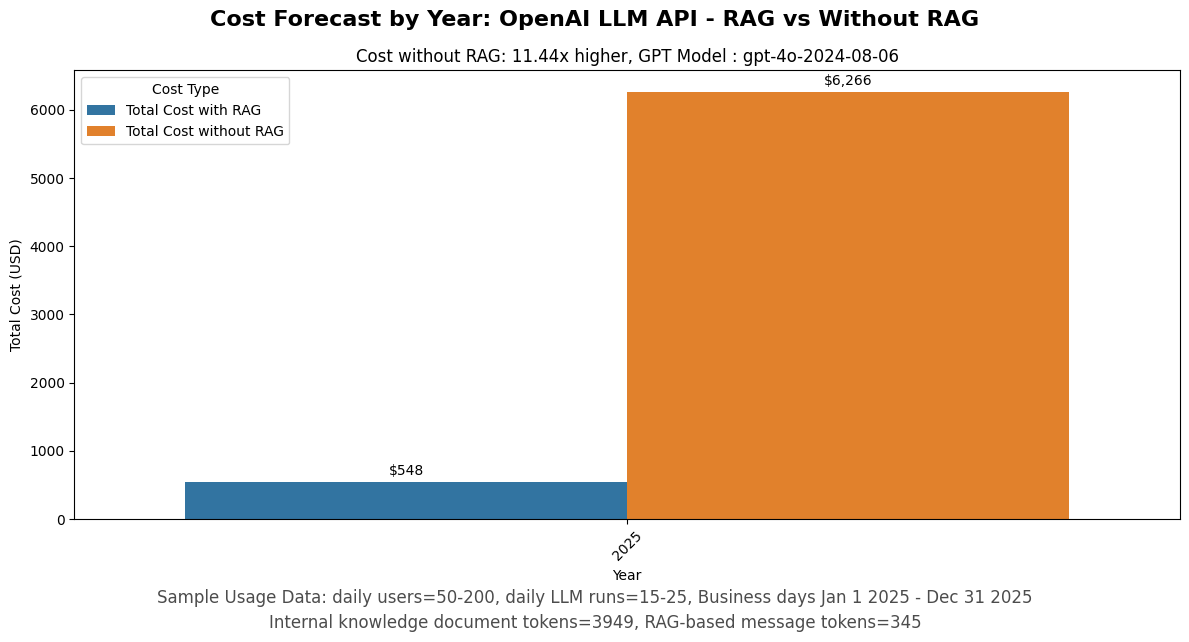

In [ ]:
plot_costs_comparison("Year")

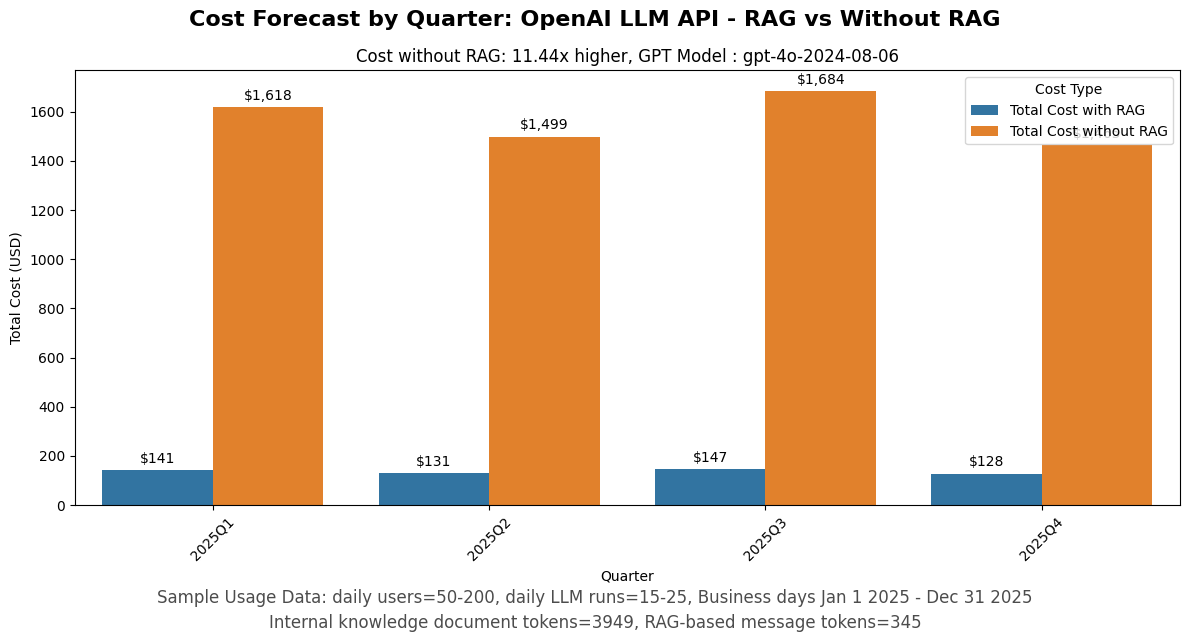

In [ ]:
plot_costs_comparison("Quarter")

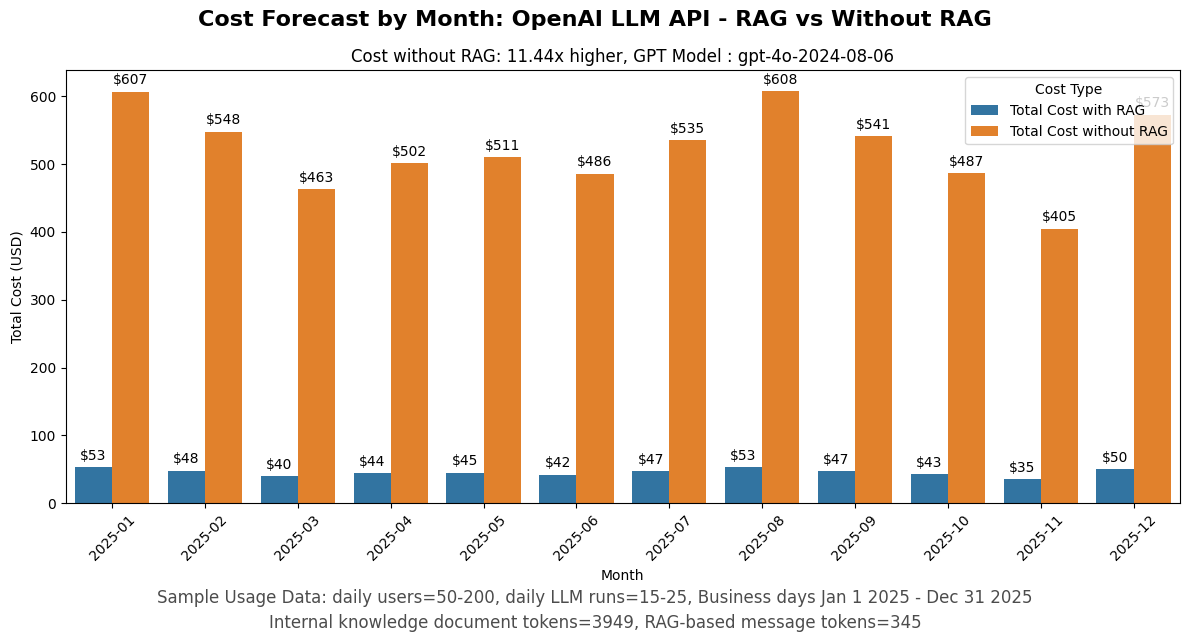

In [ ]:
plot_costs_comparison("Month")

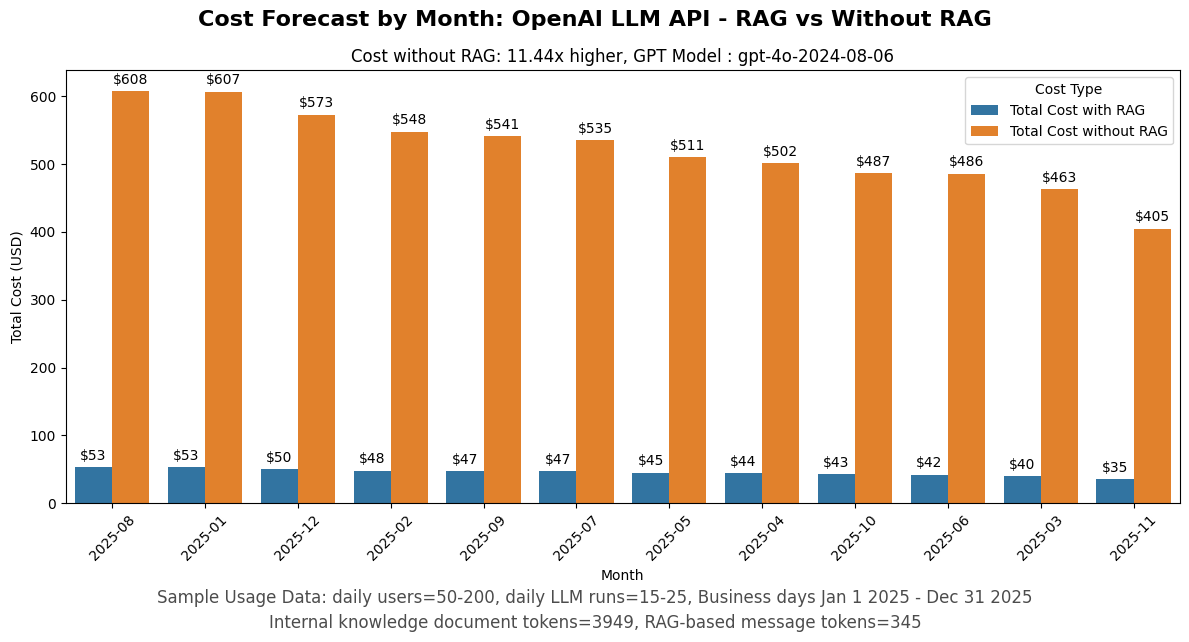

In [ ]:
plot_costs_comparison("Month", sorted_by="Total Cost without RAG")

<a id='conclusions' name='conclusions'></a>
# **Conclusions**
[Home](#home)

* The organization should leverage the RAG AI framework to enable their users to ask questions about recently published financial reports.
* Estimates show RAG could be approximately 10 times less costly than not using a RAG approach
* Estimates show total cost savings can be into the thousands per year and likely over $5,000 depending on the nubmer of users and how often they use the LLM application
* The organization should leverage and customize this cost analysis tool to develop cost optimization strategies for proprietary LLMS in their production environments.

---